In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,558990,0,0,Insomnolant,435,45,-1,9.8,"November 4, 2021",Can't really recommend this game. The Mahjong-...
1,558990,0,0,arielberian,271,12,1,4.7,"November 4, 2021",It's fun. And there's nothing more satisfying ...
2,558990,0,0,UpToTheSummit,165,57,1,22.9,"November 2, 2021",If you see first 10 seconds of gameplay and yo...
3,558990,0,0,76561197973125142,55,3,1,16.4,"October 31, 2021",Fun logic and programming challenge. Makes yo...
4,558990,0,0,Brutwarst,600,30,1,13.7,"October 30, 2021",very dope puzzle game that gives you a lot of ...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,9.8,"November 4, 2021",Can't really recommend this game. The Mahjong-...
1,0,0,1,4.7,"November 4, 2021",It's fun. And there's nothing more satisfying ...
2,0,0,1,22.9,"November 2, 2021",If you see first 10 seconds of gameplay and yo...
3,0,0,1,16.4,"October 31, 2021",Fun logic and programming challenge. Makes yo...
4,0,0,1,13.7,"October 30, 2021",very dope puzzle game that gives you a lot of ...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1
5,"October 30, 2021",Excellent puzzle game. Has a great leaderboard...,0,0,93.3,1
6,"October 30, 2021",one of the greatest puzzle - it's not that har...,0,0,49.9,1
7,"October 30, 2021","Really good puzzle game, a must buy if you lik...",0,0,29.6,1
8,"October 30, 2021",Great Puzzle Game with an interesting story. A...,0,0,12.7,1
9,"October 29, 2021",Where did all my time go lmao,0,0,30.1,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  600 non-null    object 
 1   Review_Text     598 non-null    object 
 2   Num_Helpful     600 non-null    int64  
 3   Num_Funny       600 non-null    int64  
 4   Hours_Played    600 non-null    float64
 5   Recommend       600 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 28.2+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33636/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1,1635984000
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1,1635984000
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1,1635811200
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1,1635638400
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1,1635552000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33636/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1,1635984000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1,1635984000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1,1635811200,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1,1635638400,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1,1635552000,2704


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1,1635984000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1,1635984000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1,1635811200,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1,1635638400,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1,1635552000,2704


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2705,"November 4, 2021",Can't really recommend this game. The Mahjong-...
1,2705,"November 4, 2021",It's fun. And there's nothing more satisfying ...
2,2704,"November 2, 2021",If you see first 10 seconds of gameplay and yo...
3,2704,"October 31, 2021",Fun logic and programming challenge. Makes yo...
4,2704,"October 30, 2021",very dope puzzle game that gives you a lot of ...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2630,"June 1, 2020",8
1,2630,"June 2, 2020",4
2,2630,"June 3, 2020",2
3,2630,"May 28, 2020",2
4,2630,"May 30, 2020",2
...,...,...,...
311,2704,"November 2, 2021",1
312,2704,"October 29, 2021",1
313,2704,"October 30, 2021",5
314,2704,"October 31, 2021",1


<AxesSubplot:>

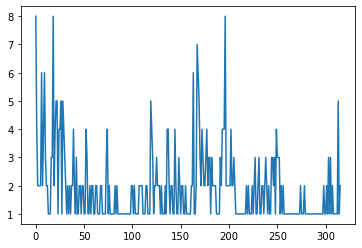

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

600

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.8987341772151898

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2630,18
1,2631,14
2,2632,13
3,2633,3
4,2634,25
...,...,...
71,2701,6
72,2702,8
73,2703,6
74,2704,8


<AxesSubplot:>

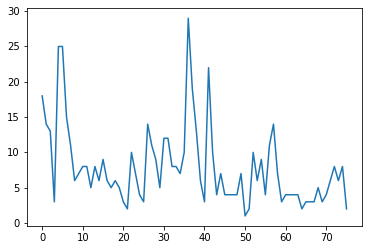

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

600

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

7.894736842105263

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1,1635984000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1,1635984000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1,1635811200,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1,1635638400,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1,1635552000,2704


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2630,0
1,2631,2
2,2632,28
3,2633,3
4,2634,8
...,...,...
71,2701,0
72,2702,0
73,2703,4
74,2704,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2630,0,0,0.0,0.000000
2631,1,0,0.0,0.142857
2632,14,0,0.0,2.153846
2633,2,0,1.0,1.000000
2634,2,0,0.0,0.320000
...,...,...,...,...
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000
2703,1,0,1.0,0.666667


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

358

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

0.5966666666666667

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2630,0
1,2631,0
2,2632,0
3,2633,3
4,2634,0
...,...,...
71,2701,0
72,2702,0
73,2703,1
74,2704,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2630,0,0,0.0,0.000000
2631,0,0,0.0,0.000000
2632,0,0,0.0,0.000000
2633,3,0,0.0,1.000000
2634,0,0,0.0,0.000000
...,...,...,...,...
2701,0,0,0.0,0.000000
2702,0,0,0.0,0.000000
2703,1,0,0.0,0.166667


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

85

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.14166666666666666

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2630,725.2
1,2631,2279.8
2,2632,578.0
3,2633,154.4
4,2634,1594.1
...,...,...
71,2701,126.5
72,2702,132.3
73,2703,159.5
74,2704,268.6


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2630,108.3,7.1,31.70,40.288889
2631,938.8,13.4,39.10,162.842857
2632,105.0,10.4,30.60,44.461538
2633,101.1,18.2,35.10,51.466667
2634,635.1,3.6,23.90,63.764000
...,...,...,...,...
2701,38.0,8.0,21.05,21.083333
2702,31.0,5.3,14.95,16.537500
2703,43.0,2.2,30.70,26.583333


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

23829.1

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

39.715166666666605

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2630,1.000000
1,2631,1.000000
2,2632,1.000000
3,2633,1.000000
4,2634,1.000000
...,...,...
71,2701,1.000000
72,2702,1.000000
73,2703,0.333333
74,2704,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2630,1,1,1.0,1.000000
2631,1,1,1.0,1.000000
2632,1,1,1.0,1.000000
2633,1,1,1.0,1.000000
2634,1,1,1.0,1.000000
...,...,...,...,...
2701,1,1,1.0,1.000000
2702,1,1,1.0,1.000000
2703,1,-1,1.0,0.333333


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

562

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.9366666666666666

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,9.8,-1,1635984000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,4.7,1,1635984000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,22.9,1,1635811200,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,16.4,1,1635638400,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,13.7,1,1635552000,2704


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,0.009580,0.0,1.000000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,0.004437,1.0,1.000000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,0.022789,1.0,0.996190,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,0.016235,1.0,0.992381,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,0.013512,1.0,0.990476,2704
...,...,...,...,...,...,...,...,...
595,"March 16, 2021","If you like puzzles, programming, or optimizin...",0,0,0.010890,1.0,0.556190,2671
596,"March 15, 2021",This is an incredible concept of an open-ended...,0,0,0.009277,1.0,0.554286,2671
597,"March 15, 2021","Absolutely superb theming/aesthetic, cute writ...",0,0,0.003227,1.0,0.554286,2671
598,"March 14, 2021",Really enjoyable puzzle game. Actually got me ...,0,0,0.020873,1.0,0.552381,2671


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33636/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 4, 2021",Can't really recommend this game. The Mahjong-...,0,0,0.009580,0.0,1.000000,2705
1,"November 4, 2021",It's fun. And there's nothing more satisfying ...,0,0,0.004437,1.0,1.000000,2705
2,"November 2, 2021",If you see first 10 seconds of gameplay and yo...,0,0,0.022789,1.0,0.996190,2704
3,"October 31, 2021",Fun logic and programming challenge. Makes yo...,0,0,0.016235,1.0,0.992381,2704
4,"October 30, 2021",very dope puzzle game that gives you a lot of ...,0,0,0.013512,1.0,0.990476,2704
5,"October 30, 2021",Excellent puzzle game. Has a great leaderboard...,0,0,0.093778,1.0,0.990476,2704
6,"October 30, 2021",one of the greatest puzzle - it's not that har...,0,0,0.050015,1.0,0.990476,2704
7,"October 30, 2021","Really good puzzle game, a must buy if you lik...",0,0,0.029545,1.0,0.990476,2704
8,"October 30, 2021",Great Puzzle Game with an interesting story. A...,0,0,0.012504,1.0,0.990476,2704
9,"October 29, 2021",Where did all my time go lmao,0,0,0.030049,1.0,0.988571,2704


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2630    [It was really fun. It's a good puzzle game th...
2631    [The trailer looked cool, but I was worried it...
2632    [Really amazing. I like how you can choose to ...
2633    [Be prepared to stay up until 5 am., According...
2634    [From very simple rules and mechanics, this ga...
2635    [Good puzzles that distill the essence of opti...
2636    [best, Excellent graphics, story, and music. M...
2637    [its neat, I think if you have patience and li...
2638    [In-depth puzzle / mechanical game, where you ...
2639    [A calming puzzle game with gorgeous visuals, ...
2640    [Opus Magnum is a good game and you should pla...
2641    [Another Gem from Zachtronics. Those who know ...
2642    [Not to brag, but I managed to get the final s...
2643    [fun and challenging puzzles with a steady inc...
2644    [Great game, This game is extremely complicate...
2645    [ the main gameSigmar's Garden time, Great fun...
2646    [make me feel like a genius, Easily my favorit..

In [52]:
# storing data in JSON format
df_text_list.to_json('opusmag_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('opusmag_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2630  [It was really fun. It's a good puzzle game th...
1   Review_Text   2631  [The trailer looked cool, but I was worried it...
2   Review_Text   2632  [Really amazing. I like how you can choose to ...
3   Review_Text   2633  [Be prepared to stay up until 5 am., According...
4   Review_Text   2634  [From very simple rules and mechanics, this ga...
5   Review_Text   2635  [Good puzzles that distill the essence of opti...
6   Review_Text   2636  [best, Excellent graphics, story, and music. M...
7   Review_Text   2637  [its neat, I think if you have patience and li...
8   Review_Text   2638  [In-depth puzzle / mechanical game, where you ...
9   Review_Text   2639  [A calming puzzle game with gorgeous visuals, ...
10  Review_Text   2640  [Opus Magnum is a good game and you should pla...
11  Review_Text   2641  [Another Gem from Zachtronics. Those who know ...
12  Review_Text   2642  [Not to brag, 

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('opusmag_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33636/3744846733.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('opusmag_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33636/2524704.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('opusmag_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])